In [55]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


In [56]:
df = pd.read_csv("clean_data_dec05.csv")
df.head()

,Tweet,sentiment
0,luvjuan maygodblessallsoul hopepeac grace peo...,Strongly Positive
1,murtazaview pdm not permit hold dec thirteen ...,Neutral
2,cbsla restaur owner forc shut coronaviru rest...,Negative
3,sumoh7 worth read IN full gtgtgt remdesivir c...,Positive
4,lauriegarrett stellar detail report florida g...,Positive


In [58]:
X = df['Tweet']
y = df['sentiment']

In [59]:
y

0        Strongly Positive
1                  Neutral
2                 Negative
3                 Positive
4                 Positive
               ...        
12281    Strongly Positive
12282    Strongly Positive
12283    Strongly Positive
12284             Negative
12285             Positive
Name: sentiment, Length: 12286, dtype: object

In [60]:
import sklearn

from sklearn import preprocessing

lab_enc =preprocessing.LabelEncoder()

y_encoded = lab_enc.fit_transform(y)

In [62]:
np.unique(y_encoded)

array([0, 1, 2, 3, 4])

In [61]:
np.unique(y)

array(['Negative', 'Neutral', 'Positive', 'Strongly Negative',
       'Strongly Positive'], dtype=object)

In [63]:
label_text = list(np.unique(y))
label_numeric = list(np.unique(y_encoded))

In [64]:
df_labels = pd.DataFrame(list(zip(label_text,label_numeric)),columns=['Text','Numeric'])

In [65]:
df_labels

,Text,Numeric
0,Negative,0
1,Neutral,1
2,Positive,2
3,Strongly Negative,3
4,Strongly Positive,4


In [ ]:
#df_labels.to_csv('Labels.csv')

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.20, random_state=42,shuffle=True)

In [17]:
type(X_train)

pandas.core.series.Series

In [20]:
Y_train = pd.DataFrame(y_train,columns=['sentiment'])

In [22]:
dict_label = Y_train['sentiment'].value_counts()
max(dict_label)

4269

<AxesSubplot:xlabel='sentiment', ylabel='count'>

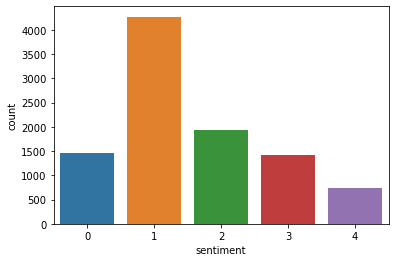

In [37]:
import seaborn as sns
sns.countplot(x='sentiment', data=Y_train)

In [18]:
print('Train_X : ',len(X_train))
print('Test_X : ',len(X_test))
print('Train_Y : ',len(y_train))
print('Test_Y : ',len(y_test))

Train_X :  9828
Test_X :  2458
Train_Y :  9828
Test_Y :  2458


In [25]:
data_train = pd.DataFrame()
data_train['Tweet'] =X_train
data_train['sentiment'] = y_train
data_train.head() 

,Tweet,sentiment
4250,greatpoet mahyartousi did ask want coronaviru...,2
7146,cafoodbank fractweet crystal fitzsimon “schoo...,2
2627,bsadams25 coronaviru australia live news sydn...,1
4605,she 102 she live one thousand nine hundr eight...,0
3827,who rememb dailybrief everi singl day conserv ...,1


In [44]:
import tensorflow
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test) 
X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [48]:
maxLengthTrain = max(len(x) for x in X_train ) 
maxLengthTest = max(len(x) for x in X_test ) 
print(maxLengthTrain)
print(maxLengthTest)
maxlen = 100

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

39
35


In [50]:
X_train

array([[6688, 4782, 1372, ...,    0,    0,    0],
       [6689, 6690, 3840, ...,    0,    0,    0],
       [6695,    1,  459, ...,    0,    0,    0],
       ...,
       [1949,  844, 1231, ...,    0,    0,    0],
       [2030,  188,  172, ...,    0,    0,    0],
       [ 608,  543,  118, ...,    0,    0,    0]])

In [51]:
number_sample_each_class = 5000
class0 = number_sample_each_class
class1 = number_sample_each_class
class2 = number_sample_each_class
class3 = number_sample_each_class
class4 = number_sample_each_class
strategy = {0:class0,1:class1,2:class2,3:class3,4:class4}

In [15]:
strategy

{0: 5000, 1: 5000, 2: 5000, 3: 5000, 4: 5000}

In [52]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy=strategy)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

C:\Users\puspa\Anaconda3\envs\tf\lib\site-packages\imblearn\utils\_validation.py:326: UserWarning: After over-sampling, the number of samples (5000) in class 0 will be larger than the number of samples in the majority class (class #1 -> 4269)
  n_samples_majority,
C:\Users\puspa\Anaconda3\envs\tf\lib\site-packages\imblearn\utils\_validation.py:326: UserWarning: After over-sampling, the number of samples (5000) in class 1 will be larger than the number of samples in the majority class (class #1 -> 4269)
  n_samples_majority,
C:\Users\puspa\Anaconda3\envs\tf\lib\site-packages\imblearn\utils\_validation.py:326: UserWarning: After over-sampling, the number of samples (5000) in class 2 will be larger than the number of samples in the majority class (class #1 -> 4269)
  n_samples_majority,
C:\Users\puspa\Anaconda3\envs\tf\lib\site-packages\imblearn\utils\_validation.py:326: UserWarning: After over-sampling, the number of samples (5000) in class 3 will be larger than the number of samples in 

In [53]:
data_train_sm = pd.DataFrame(X_train_sm)
data_train_sm['sentiment'] = y_train_sm
data_train_sm.head()

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,sentiment
0,6688,4782,1372,195,180,1,20,638,4783,4784,...,0,0,0,0,0,0,0,0,0,2
1,6689,6690,3840,6691,6692,2506,137,4786,3841,6693,...,0,0,0,0,0,0,0,0,0,2
2,6695,1,459,85,259,2817,3842,511,15,8,...,0,0,0,0,0,0,0,0,0,1
3,207,1447,207,85,14,50,246,25,942,495,...,0,0,0,0,0,0,0,0,0,0
4,348,746,4787,215,470,17,1015,6696,1262,1947,...,0,0,0,0,0,0,0,0,0,1


<AxesSubplot:xlabel='sentiment', ylabel='count'>

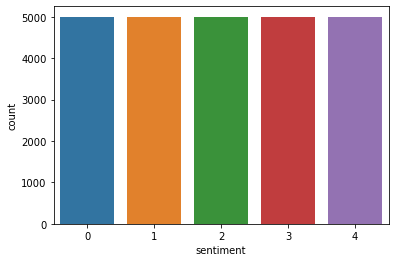

In [54]:
sns.countplot(x='sentiment', data=data_train_sm)